# 다음 분기 어떤 게임을 설계해야 할까?

## 1. 데이터 전처리<br>
- 1) 데이터 불러오기 및 불필요한 컬럼 제거
- 2) 데이터 기본정보 및 결측치확인<br>  

## 2. 분석 목표<br>
- 1) 지역에 따라 선호하는 장르가 다를까?<br>
    - 1.1) 지역별 배출량 비율<br>
    - 1.2) 매출 연관성이 큰 지역<br>
- 2) 연도별 게임의 트랜드가 있을까 <br> 
- 3) Top 5 Games<br>
    - 3.1) Top 5 Game Platform<br>

## 3. 분석 결과

# 1. 데이터 전처리

### 1) 데이터 불러오기 및 불필요한 컬럼 제거

In [392]:
import pandas as pd

file = './vgames2.csv'

df = pd.read_csv(file)
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 2) 데이터 기본정보 및 결측치 확인

데이터 타입

In [213]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

데이터 기본 구조

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


총 16598의 행과 9개의 컬럼

Year, Genre, Publisher 컬럼에 결측값 존재 확인

Sales 컬럼들 categorical -> numerical 변환 

In [396]:
df.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
15617,Brooktown High: Senior Year,PSP,2007.0,Simulation,Konami Digital Entertainment,0.09,0,0,0.01
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
10130,Hakuoki Zuisouroku Omokage Hana,PSV,2015.0,Action,Idea Factory,0,0,0.03,0K
6763,Start the Party!,PS3,2010.0,Misc,Sony Computer Entertainment,0.07M,0.42,0,0.14
9148,Mario Golf,GB,1999.0,Action,Nintendo,0,0,0.31,0
4498,Kamigami no Asobi InFinite,PSV,2016.0,Adventure,Broccoli,0,0,0.01,0
14517,Space Invaders Revolution,DS,2005.0,Shooter,Rising Star Games,0.01,0,0,0
8426,SoulCalibur IV,PS3,2008.0,Fighting,Ubisoft,0.72,0.41,0.14,0.2
2599,Jikkyou Powerful Pro Yakyuu 15,PS2,2008.0,Sports,Konami Digital Entertainment,0,0,0.24,0
41,Knights of Honor,PC,2004.0,Strategy,Sunflowers,0,0.02,0,0.01


In [391]:
# NA_Sales
df.loc[df['NA_Sales'].str.contains('K') == True, 'NA_Sales'] = pd.to_numeric(df.loc[ df['NA_Sales'].str.contains('K') == True, 'NA_Sales'].str.replace('K','')) * 0.001
df.loc[df['NA_Sales'].str.contains('M') == True, 'NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['NA_Sales'] = df['NA_Sales'].astype(float)

# EU_Sales
df.loc[df['EU_Sales'].str.contains('K') == True, 'EU_Sales'] = pd.to_numeric(df.loc[ df['EU_Sales'].str.contains('K') == True, 'EU_Sales'].str.replace('K','')) * 0.001
df.loc[df['EU_Sales'].str.contains('M') == True, 'EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].astype(float)

# JP_Sales
df.loc[df['JP_Sales'].str.contains('K') == True, 'JP_Sales'] = pd.to_numeric(df.loc[ df['JP_Sales'].str.contains('K') == True, 'JP_Sales'].str.replace('K','')) * 0.001
df.loc[df['JP_Sales'].str.contains('M') == True, 'JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].astype(float)

# Other_Sales
df.loc[df['Other_Sales'].str.contains('K') == True, 'Other_Sales'] = pd.to_numeric(df.loc[ df['Other_Sales'].str.contains('K') == True, 'Other_Sales'].str.replace('K','')) * 0.001
df.loc[df['Other_Sales'].str.contains('M') == True, 'Other_Sales'] = df['Other_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].astype(float)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [397]:
# Year 컬럼 결측치
df['Year'].sort_values()

9276     0.0
16394    0.0
14666    0.0
2249     1.0
8681     1.0
        ... 
16240    NaN
16275    NaN
16278    NaN
16425    NaN
16432    NaN
Name: Year, Length: 16598, dtype: float64

In [335]:
# Year 컬럼의 결측치 100 으로 변환 및 이상치 처리

df['Year'] = df['Year'].fillna(100)

for i in range(len(df['Year'])):
    if df['Year'][i] < 20:
        df['Year'][i] += 2000
    elif 60 < df['Year'][i] and df['Year'][i] < 100:
         df['Year'][i] += 1900
    else:
        continue  

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [232]:
# 이상치, 결측치 -> 100 변환 확인
df['Year'].sort_values()

4617      100.0
10637     100.0
13406     100.0
13450     100.0
13488     100.0
          ...  
6192     2016.0
10107    2017.0
15233    2017.0
5310     2017.0
6906     2020.0
Name: Year, Length: 16598, dtype: float64

In [233]:
# Genre, Publisher 컬럼의 결측치는 수가 적어 영향력이 미미하다 판단하여 삭제
print(df['Genre'].isnull().sum())
print(df['Publisher'].isnull().sum())

50
58


In [336]:
df.dropna(subset = ['Genre','Publisher'], inplace = True)

In [235]:
print(df['Genre'].isnull().sum())
print(df['Publisher'].isnull().sum())

0
0


## 2. 분석 목표

- 1) 지역에 따라 선호하는 장르가 다를까?<br>
    - 1.1) 지역별 매출량 비율<br>
    - 1.2) 매출 연관성이 큰 지역<br>
- 2) 연도별 게임의 트랜드가 있을까 <br> 
- 3) Top 5 Games<br>
    - 3.1) Top 5 Game Platform<br>


### 1) 지역에 따라 선호하는 장르가 다를까?

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
# 지역별 TOP 5 장르 정렬

# NA_Sales
df_NA = df[['Genre','NA_Sales']].sort_values(by = 'Genre')
df_NA = df_NA.groupby(['Genre']).sum().head().sort_values(by = 'NA_Sales', ascending = False).reset_index()


# EU_Sales
df_EU = df[['Genre','EU_Sales']].sort_values(by = 'Genre')
df_EU = df_EU.groupby(['Genre']).sum().head().sort_values(by = 'EU_Sales', ascending = False).reset_index()


# JP_Sales
df_JP = df[['Genre','JP_Sales']].sort_values(by = 'Genre')
df_JP = df_JP.groupby(['Genre']).sum().head().sort_values(by = 'JP_Sales', ascending = False).reset_index()


# Other_Sales
df_OT = df[['Genre','Other_Sales']].sort_values(by = 'Genre')
df_OT = df_OT.groupby(['Genre']).sum().head().sort_values(by = 'Other_Sales', ascending = False).reset_index()


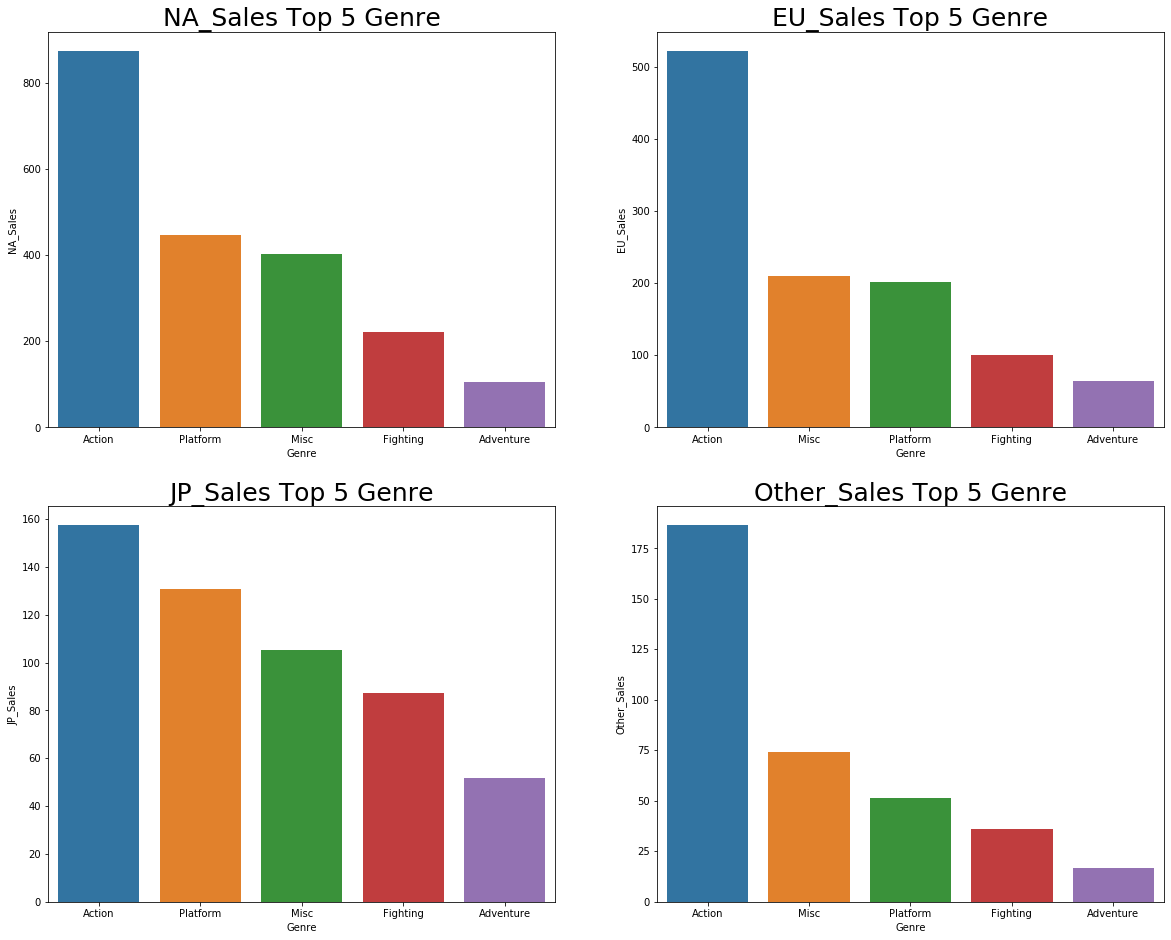

In [238]:
fig = plt.figure(figsize = (20,16))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('NA_Sales Top 5 Genre', fontsize = 25)
ax1 = sns.barplot(data = df_NA, x = 'Genre', y = 'NA_Sales')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('EU_Sales Top 5 Genre', fontsize = 25)
ax2 = sns.barplot(data = df_EU, x = 'Genre', y = 'EU_Sales')

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('JP_Sales Top 5 Genre', fontsize = 25)
ax3 = sns.barplot(data = df_JP, x = 'Genre', y = 'JP_Sales')

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Other_Sales Top 5 Genre', fontsize = 25)
ax4 = sns.barplot(data = df_OT, x = 'Genre', y = 'Other_Sales')

### 1.1) 지역 별 매출량 비율

In [339]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [371]:
df2 = {'NA_sum' : [df['NA_Sales'].sum()],
       'EU_sum' : [df['EU_Sales'].sum()],
       'JP_sum' : [df['JP_Sales'].sum()],
       'Other_sum' : [df['Other_Sales'].sum()],
       'Total_Sales' : [df['Total_Sales'].sum()]}
df2 = pd.DataFrame(df2)
df2

,NA_sum,EU_sum,JP_sum,Other_sum,Total_Sales
0,4363.8,2416.33,1277.21,791.54,8848.88


In [370]:
df_ratio = pd.DataFrame()
df_ratio['NA_ratio'] = df2['NA_sum'] / df2['Total_Sales']
df_ratio['EU_ratio'] = df2['EU_sum'] / df2['Total_Sales']
df_ratio['JP_ratio'] = df2['JP_sum'] / df2['Total_Sales']
df_ratio['Other_ratio'] = df2['Other_sum'] / df2['Total_Sales']
df_ratio

,NA_ratio,EU_ratio,JP_ratio,Other_ratio
0,0.493147,0.273066,0.144336,0.089451


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


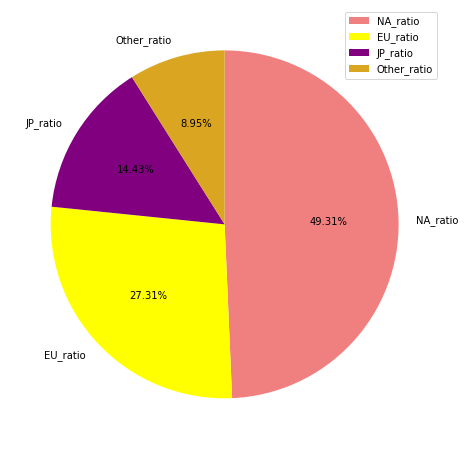

In [389]:
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white')
ax = fig.add_subplot() 

pie = ax.pie(df_ratio,
       startangle=90, 
       counterclock=False, 
       labels = df_ratio.columns,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = ['lightcoral','yellow','purple','goldenrod','lightcoral'] 
       )
plt.legend(df_ratio)
plt.show()


### 1.2) 매출 연관성이 큰 지역

In [239]:
# 상관분석 : 변수 간에 양(+), 음(-)의 관계 분석
df_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr()
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.767650,0.447932,0.634840
EU_Sales,0.767650,1.000000,0.431627,0.728149
JP_Sales,0.447932,0.431627,1.000000,0.284989
Other_Sales,0.634840,0.728149,0.284989,1.000000


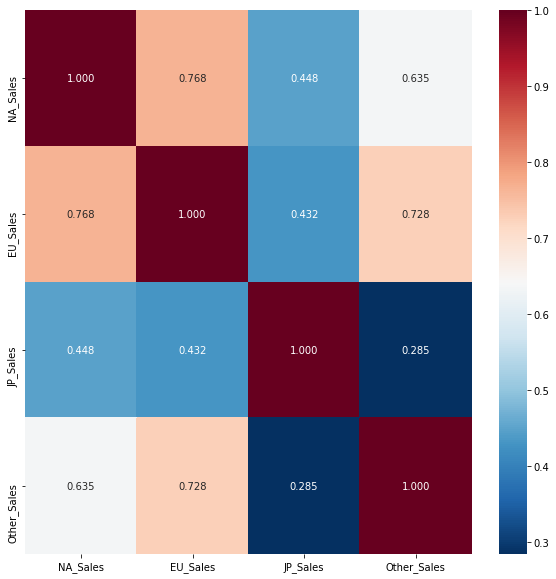

In [240]:
fig, ax = plt.subplots(figsize = (10,10)) 
sns.heatmap(df_sales, cbar = True, annot = True, fmt = '.3f', cmap = 'RdBu_r' )

상관 분석 결과 

NA_Sales - EU_Sales : 0.728

JP_Sales - Other_Sales : 0.285

### 2) 연도별 게임의 트랜드가 있을까

In [248]:
# 연도별 게임 장르 출고량
# 이상치를 모아둔 100, 샘플이 너무 작은 2017, 2020년도 데이터 제외
df_cross = pd.crosstab(df.Year, df.Genre).reset_index()
df_cross = df_cross[1:-2]
df_cross

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1,1980.0,1,0,1,4,0,0,0,0,2,0,0,0
2,1981.0,25,0,0,0,3,2,1,0,10,1,4,0
3,1982.0,18,0,0,1,5,3,2,0,5,0,2,0
4,1983.0,7,1,0,1,5,1,0,0,1,0,1,0
5,1984.0,1,0,0,1,1,3,3,0,3,0,2,0
6,1985.0,2,0,1,0,4,4,0,0,1,1,1,0
7,1986.0,6,0,0,0,6,0,1,1,4,0,3,0
8,1987.0,2,1,2,0,2,0,0,3,2,0,4,0
9,1988.0,2,0,0,0,4,1,1,3,1,1,2,0
10,1989.0,2,0,0,1,3,5,0,2,1,0,3,0


귀무가설 : Year와 Genre 간에는 관련성이 없다.

대립가설 : Year와 Genre 간에는 관련성이 있다.


In [249]:
import scipy.stats as stats

stats.chi2_contingency(df_cross)
pvalue = stats.chi2_contingency(df_cross)[1]
pvalue

0.0


pvalue < 0.05 -> 귀무가설 기각 대립가설 채택

즉, 'Genre' 컬럼 값에 'Year' 컬럼의 값이 영향을 끼친다.

Text(0, 0.5, 'Fighting')

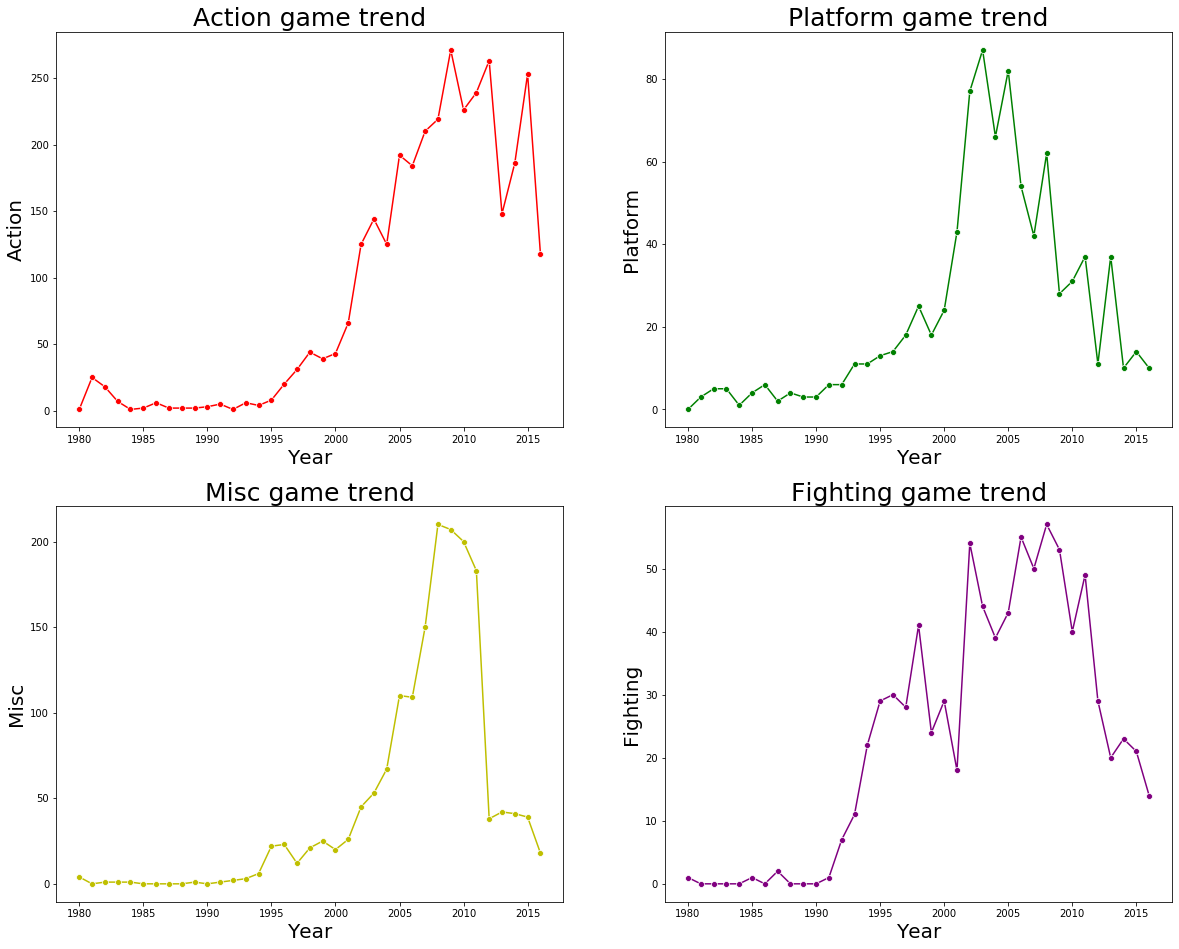

In [322]:
# 연도에 따른 인기 Top4 Genre 판매량 변화

fig = plt.figure(figsize = (20,16))

ax1_1 = fig.add_subplot(2,2,1)
ax1_1.set_title('Action game trend', fontsize = 25)
ax1_1 = sns.lineplot(data = df_cross, x = 'Year', y = 'Action', color = 'r', marker = 'o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Action', fontsize = 20)

ax2_2 = fig.add_subplot(2,2,2)
ax2_2.set_title('Platform game trend', fontsize = 25)
ax2_2 = sns.lineplot(data = df_cross, x = 'Year', y = 'Platform', color = 'g', marker = 'o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Platform', fontsize = 20)

ax3_3 = fig.add_subplot(2,2,3)
ax3_3.set_title('Misc game trend', fontsize = 25)
ax3_3 = sns.lineplot(data = df_cross, x = 'Year', y = 'Misc', color = 'y', marker = 'o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Misc', fontsize = 20)

ax4_4 = fig.add_subplot(2,2,4)
ax4_4.set_title('Fighting game trend', fontsize = 25)
ax4_4 = sns.lineplot(data = df_cross, x = 'Year', y = 'Fighting', color = 'purple', marker = 'o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Fighting', fontsize = 20)

### 3) TOP 5 Game

In [309]:
top_5 = df.sort_values(by = 'Total_Sales', ascending = False).head()
top_5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


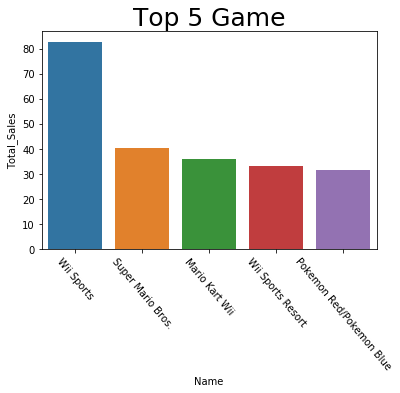

In [326]:
ax = sns.barplot(data = top_5, x = 'Name', y = 'Total_Sales')
ax.set_title('Top 5 Game', fontsize = 25)
plt.xticks(rotation = -50)
plt.show()

### 3.1) 플랫폼 매출 Top 5

In [294]:
Plat_top5 = df.groupby(['Platform']).Total_Sales.sum().sort_values(ascending= False)
Plat_top5 = pd.DataFrame(Plat_top5).reset_index().
head()
Plat_top5

,Platform,Total_Sales
0,PS2,1241.44
1,X360,978.83
2,PS3,954.69
3,Wii,916.65
4,DS,820.47


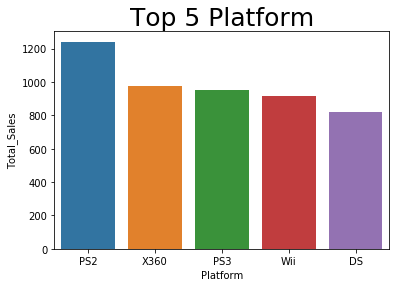

In [296]:
ax2 = sns.barplot(data = Plat_top5, x = 'Platform', y = 'Total_Sales')
ax2.set_title('Top 5 Platform', fontsize = 25)
plt.show()

## 3. 분석 결과

- Taget : 강한 양(+)의 관계 NA - EU <br>

- Genre : Action, Platform, Misc<br>

- Platform : PS2의 매출량이 가장 높으나, 콘솔 게임은 게임기를 구매한 고객만 플레이 할수 있고, 다음 세대로 바뀌게 되면 단종이 되기 때문에, 지속적인 판매 가능하고 접근성이 좋은 PC, 모바일 게임 출시가 좋아보임